In [1]:
1

1

In [1]:
import pandas as pd
import pyBigWig
import numpy as np
import seaborn as sns
import re
from liftover import get_lifter
data='/labs/mpsnyder/moqri/data/index/'
datam='/labs/mpsnyder/moqri/data/mont/'

ch=1

v='38'
h9_bw='http://smithdata.usc.edu/methbase/data/Xie-Human-2013/Human_H9/tracks_hg'+v+'/Human_H9.meth.bw'
ips_bw='http://smithdata.usc.edu/methbase/data/Lister-iPSC-2011/Human_FFiPSC69/tracks_hg'+v+'/Human_FFiPSC69.meth.bw'
ezh_h9='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE76nnn/GSE76626/suppl/GSE76626_ChIP-Seq_RPM.txt.gz' ## hg38

ct_bw='http://smithdata.usc.edu/methbase/data/Heyn-Human-NewbornCentenarian-2012/Human_CD4T-100yr/tracks_hg'+v+'/Human_CD4T-100yr.meth.bw'
nb_bw='http://smithdata.usc.edu/methbase/data/Heyn-Human-NewbornCentenarian-2012/Human_CD4T-Newborn/tracks_hg'+v+'/Human_CD4T-Newborn.meth.bw'
so_bw='http://smithdata.usc.edu/methbase/data/Vandiver-Human-2015/Human_Epidermis-old-sun-exposed/tracks_hg'+v+'/Human_Epidermis-old-sun-exposed.meth.bw'
sy_bw='http://smithdata.usc.edu/methbase/data/Vandiver-Human-2015/Human_Epidermis-young-sun-exposed/tracks_hg'+v+'/Human_Epidermis-young-sun-exposed.meth.bw'


hg19tohg38='http://hgdownload.soe.ucsc.edu/goldenPath/hg19/liftOver/hg19ToHg38.over.chain.gz'

def bw2df(cell,ch):
    df=bws[cell].intervals("chr"+str(ch))
    print(len(df))
    df=pd.DataFrame(df)
    df.index=df[0]
    df=df[2]
    dfs.append(df)    
    return(dfs)
def bw2df(cell):
    bw=cell
    bw=pyBigWig.open(bw)
    bws=[]
    for i,r in ezh.iterrows():
        print('',end='.')
        bwi=bw.intervals("chr"+str(r['chrom']),r['chromStart'],r['chromEnd'])
        if bwi is not None:
            for b in bwi:
                bws.append([r['chrom'],b[0],b[2]])
    df=pd.DataFrame(bws)
    print(df.shape)
    return df

In [2]:
ezh=pd.read_table(ezh_h9,index_col=0)
ezh=ezh[['Chromosome','Start','End','WT_EZH2','Strand']][ezh['WT_EZH2']>1]
ezh.columns=['chrom', 'chromStart', 'chromEnd', 'value','s']
ezh=ezh[~ezh.index.str.contains('-AS')]
ezh=ezh[ezh.index.str.contains('001')]
ezh=ezh[ezh.chrom!='X']
ezh.index=ezh.index.str.strip('-001_upstream')
print(ezh.shape)
ezh['d']=ezh.chromEnd-ezh.chromStart
ezh.d.sum()/1000000

(929, 5)


/home/moqri/anaconda3/envs/stem/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


4.645

In [3]:
ezh['tss']=(ezh.chromStart+ezh.chromEnd)/2

In [4]:
dfs=[]
cells=[h9_bw,ips_bw,nb_bw,ct_bw,sy_bw,so_bw]
bws={}
for cell in cells:
    bws[cell]=pyBigWig.open(cell)
    df=bw2df(cell)
    dfs.append(df)

.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................(245711, 3)
...........................................................

In [16]:
for df in dfs:
    df.drop_duplicates(inplace=True)
    df.index=df[0].astype(str)+'_'+df[1].astype(str)
    df.drop([0,1],1,inplace=True)    

<ipython-input-16-b6135f2ef505>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop([0,1],1,inplace=True)


In [18]:
for i in range(6):
    dfs[i].columns=[['h','i','n','c','y','o'][i]]

In [21]:
dg=dfs[0]
for df in dfs[1:]:
    dg=dg.merge(df,left_index=True,right_index=True,how='left')

<AxesSubplot:>

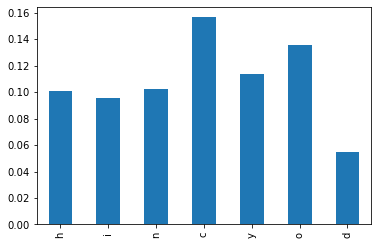

In [66]:
dg.mean().plot(kind='bar')

In [32]:
#dg.to_csv('ezs.csv')

In [5]:
df=pd.read_csv('ezs.csv',index_col=0)
df.shape

(210130, 6)

In [15]:
tss=(ezh.chrom.astype(int)*10**9+ezh.tss).values

In [24]:
df['g']=df.index.str.split('_').str[0].astype(int)*10**9+df.index.str.split('_').str[1].astype(int)

In [35]:
df['tss']=df.g.apply(lambda y:min(tss, key=lambda x:abs(x-y)))

In [36]:
df['d']=df.g-df.tss

<AxesSubplot:>

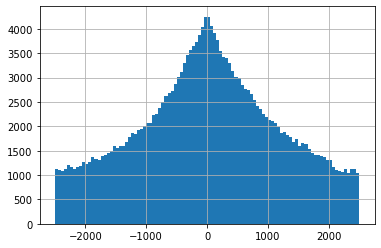

In [39]:
df.d.hist(bins=100)

In [46]:
df['dq']=pd.qcut(df.d,10)

<AxesSubplot:xlabel='dq'>

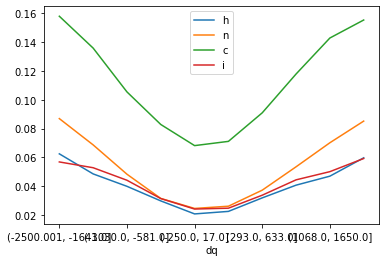

In [61]:
df[df.h<.5].groupby('dq').mean()[['h','n','c','i']].plot()

<AxesSubplot:xlabel='dq'>

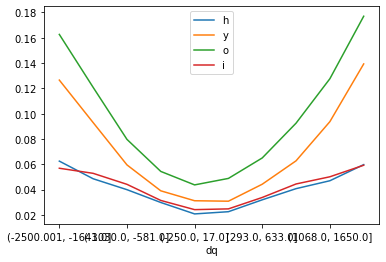

In [62]:
df[df.h<.5].groupby('dq').mean()[['h','y','o','i']].plot()

1


/home/moqri/anaconda3/envs/stem/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


2262349
2264861
2264861
2264861


<ipython-input-9-3ee99fcffa01>:14: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df=pd.concat(dfs,1)


(18105, 6)


<AxesSubplot:>

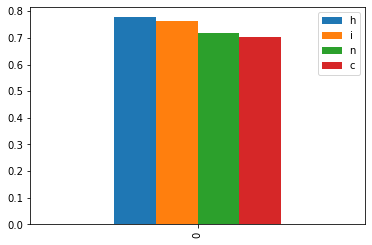

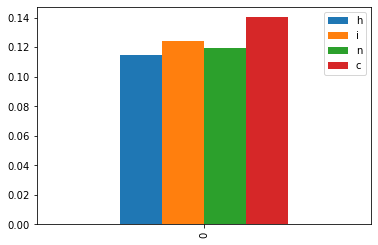

In [9]:
ggs=[]
ezs=[]
for ch in range(1,2):
    print(ch,end='\n')
    dfs=[]
    ez=ezh[ezh.chrom==str(ch)]
    #ez=ezh[ezh.chrom=='chr'+str(ch)][ezh.sourceCount>1]
    ez['r']=ez.apply(lambda x:range(x['chromStart'],x['chromEnd']),1)
    ez=ez['r'].tolist()
    ez1=set([item for sublist in ez for item in sublist])
    ez=ez1#.intersection(ez2)#.intersection(ez1)
    for cell in cells:
        dfs=bw2df(cell,ch)
    df=pd.concat(dfs,1)
    df.columns=['i','h','n','c']
    df['ind']=df.index
    df['ez']=df.ind.apply(lambda x: x in(ez))
    gg=df[~df['ez']].mean()
    ggs.append(gg)
    ez=df[df.h<2][df['ez']]
    print(ez.shape)
    ezs.append(ez.mean())   
ggs=pd.DataFrame(ggs)
ggs[['h','i','n','c']].plot(kind='bar')
ezs=pd.DataFrame(ezs)
ezs[['h','i','n','c']].plot(kind='bar')
#ggs.to_csv('ggs_skin')
#ezs.to_csv('ezs_skin')

In [36]:
dg['d']=dg.c-dg.n

<AxesSubplot:>

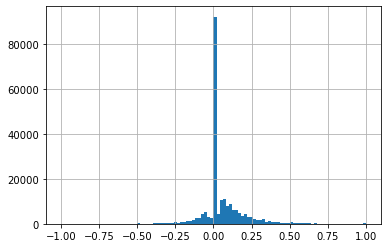

In [37]:
dg.d.hist(bins=100)

In [38]:
man='https://zhouserver.research.chop.edu/InfiniumAnnotation/20180909/HM450/HM450.hg38.manifest.tsv.gz'
man=pd.read_table(man)

In [39]:
man=man[~man.CpG_chrm.isna()][man.CpG_chrm!='chrX'][man.CpG_chrm!='chrY'][man.CpG_chrm!='chrM']
man['CpG_chrm']=man.CpG_chrm.str[3:].astype(float)

<ipython-input-39-cad03d9984f6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  man=man[~man.CpG_chrm.isna()][man.CpG_chrm!='chrX'][man.CpG_chrm!='chrY'][man.CpG_chrm!='chrM']


In [51]:
man.index=man.CpG_chrm.astype(int).astype(str)+'_'+man.CpG_beg.astype(int).astype(str)

In [83]:
ll=man.loc[dg[dg.h<.5].index.intersection(man.index)].probeID
len(ll)

12743

In [60]:
n=6
blood=pd.read_csv(datam+'/wb450.gz',sep='\t',index_col=0,skiprows=69, nrows=10**n)
print(blood.shape)
blood.head(1)

(473035, 656)


,GSM989827,GSM989828,GSM989829,GSM989830,GSM989831,GSM989832,GSM989833,GSM989834,GSM989835,GSM989836,...,GSM990618,GSM990619,GSM990620,GSM990621,GSM990622,GSM990623,GSM990624,GSM990625,GSM990626,GSM990627
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.464197,0.454883,0.485764,0.480785,0.50122,0.499918,0.485852,0.512442,0.518155,0.417986,...,0.560958,0.472081,0.508502,0.505193,0.443411,0.527496,0.588331,0.362994,0.499145,0.4586


<AxesSubplot:>

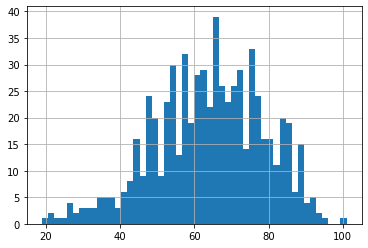

In [61]:
b_ages=pd.read_csv(datam+'/wb450.gz',sep='\t',skiprows=33,nrows=0,index_col=0).columns.values
b_ages=[float(age.strip('age: ').split('y')[0]) for age in b_ages]
b=blood.T#.drop('!series_matrix_table_end',1)
b['age']=b_ages
b.age.hist(bins=50)

In [62]:
cols=list(b.columns.intersection(ll.values))+['age']

<AxesSubplot:xlabel='age'>

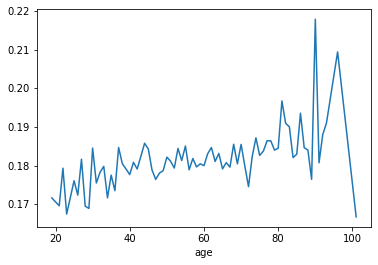

In [84]:
b[cols].groupby('age').mean().mean(1).plot()

In [85]:
t=b[cols].groupby('age').mean().mean(1)/b.groupby('age').mean().mean(1)

<AxesSubplot:xlabel='age'>

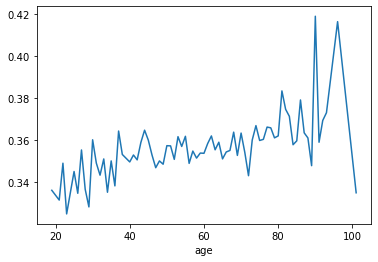

In [86]:
t.plot()